%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# load the Census Income dataset

dataset = fetch_openml[name='adult', as_frame=True)
df, y = dataset.data, dataset.target

df.head()

The adult dataset continas a mix of numerical and String data, make it a challenging probelm to train. Some columns incorrectly labeled as category type

pd.DataFrames({'Data type': df.dtypes}).T

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (934595982.py, line 3)

In [1]:
# Install dependencies (uncomment if running in a new environment)
# !pip install flaml scikit-learn

from flaml import AutoML
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Adult dataset
dataset = fetch_openml(name="adult", version=2, as_frame=True)
x, y = dataset.data, dataset.target
x = df.head()
y.head()

data_copy = x.copy()
data_copy["incode"] = y

data_copy.head()


NameError: name 'df' is not defined

In [2]:
import pandas as pd

pd.DataFrame({"data type": data_copy.dtypes}).T

NameError: name 'data_copy' is not defined

In [87]:
pd.DataFrame({'% missing values': data_copy.isnull().sum()*100/ len(data_copy)}).T

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,incode
% missing values,0.0,20.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[Text(0, 0, '37155'), Text(0, 0, '11687')]

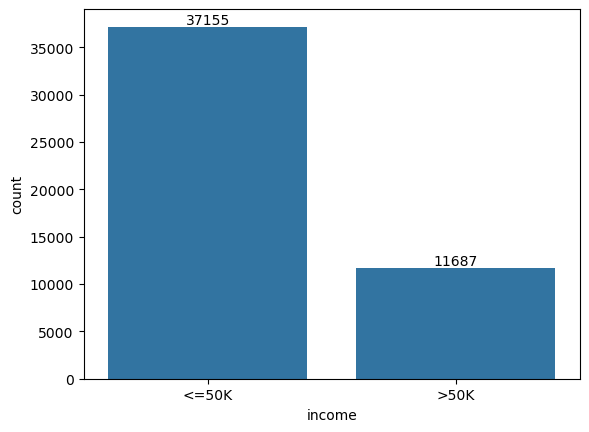

In [88]:
import seaborn as sns

y_df = pd.DataFrame(y)
y_df.columns = ['income']

ax = sns.countplot(x="income", data=y_df)
ax.bar_label(ax.containers[0])

In [89]:
from sklearn.model_selection import train_test_split


# 1. Load the Adult dataset
dataset = fetch_openml(name="adult", version=2, as_frame=True)
x, y = dataset.data, dataset.target
#x = df.head()
#y.head()

data_copy = x.copy()
data_copy["incode"] = y

# Make a copy of the dataset
df = data_copy.copy()

# Define numeric columns correctly
numeric_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

# Convert only numeric columns to int
for col in numeric_columns:
    df[col] = df[col].astype(int)

# Convert target values to numeric (1 for >50K, 0 for <=50K)
y_numeric = y.map({'>50K': 1, '<=50K': 0}).astype(int)

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    df, y_numeric, train_size=0.7, random_state=0
)

# Check shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (34189, 15)
Test shape: (14653, 15)


#Oracle AutoML

#setting the engine
init(engine='local')

AutoML consists of the main modules
    preprocessing - clean, impute, engineer, and normaize features
    algorithm selection
        AdaBoostClassifier
        DecisionTreeClassifier
        ExtraTreesClassifier
        TorchMLPClassifier
        KNeighborsClassifier
        LGBMCLassifier
        LinearSVC
        LogisticRegression
        RandomForestClassifier
        SVC
        XGBClassifier
        GaussianNB
    adaptive sampling
    feature selection
    hyperparameter tuning

    Train a model using autoML
    est1 = automl.Pipeline[tasks='classification')
    est1.fit(X_train, y_train)
    

In [90]:
from sqlalchemy import create_engine

# Create connection (replace 'local' with your DB connection string)
engine = create_engine('sqlite:///local.db')  # example: SQLite file

# Now you can use engine, e.g.
conn = engine.connect()
print("Database connection established!")


Database connection established!


In [91]:
def engine(name):
    return f"Initialized engine: {name}"

def init(obj):
    print(f"Running init on {obj}")

init(engine('local'))

Running init on Initialized engine: local


In [148]:
#est1 = automl.Pipeline(task='classfication')
#est1.fit(X_train, y_train)

from flaml import AutoML

# Create an AutoML instance
automl = AutoML()

# Configure AutoML
automl_settings = {
    "time_budget": 120,  # time in seconds
    "metric": "accuracy",  # optimization metric
    "task": "classification",  # correct spelling
    "log_file_name": "adult_automl.log",
}

# Train AutoML
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

# Evaluate
y_pred = automl.predict(X_test)
print("Predictions:", y_pred[:10])

[flaml.automl.logger: 10-12 21:31:18] {1752} INFO - task = classification
[flaml.automl.logger: 10-12 21:31:18] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-12 21:31:18] {1862} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 10-12 21:31:18] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 10-12 21:31:19] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-12 21:31:19] {2417} INFO - Estimated sufficient time budget=1012s. Estimated necessary time budget=23s.
[flaml.automl.logger: 10-12 21:31:19] {2466} INFO -  at 0.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 10-12 21:31:19] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-12 21:31:19] {2466} INFO -  at 0.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 

Oracle AutoML
Pipeline(model_list=['DecisionTreeClassifier', 'ExtraTreeClassifier', 'GaussianNB', 'LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SVC', 'XGBClassifier',
'TorchMLPclassifier', 'CatBoostClassifier'])

y_proba = est1.predict_proba(X_test)
score_default = roc_auc_score(y_test, y_proba[:, 1])

print(f'Score on test data : {score_default}')

In [93]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Best model: {automl.best_estimator}")
print(f"Best hyperparameters: {automl.best_config}")
print(f"Validation accuracy: {automl.best_loss}")
print(f"Test accuracy: {accuracy:.4f}")


Best model: lgbm
Best hyperparameters: {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': np.float64(0.09999999999999995), 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.0009765625), 'reg_lambda': np.float64(1.0)}
Validation accuracy: 0.0
Test accuracy: 1.0000


est1.print_summary()


In [94]:
import pandas as pd

rows = []
for est, cfg in automl.best_config_per_estimator.items():
    rows.append({
        "estimator": est,
        "best_config": cfg,
    })

# Tell pandas not to truncate long values
pd.set_option('display.max_colwidth', None)

leaderboard = pd.DataFrame(rows)
leaderboard


,estimator,best_config
0,lgbm,"{'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}"
1,rf,"{'n_estimators': 4, 'max_features': 0.3795029283365027, 'max_leaves': 13, 'criterion': 'gini'}"
2,xgboost,"{'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}"
3,extra_tree,"{'n_estimators': 4, 'max_features': 0.3795029283365027, 'max_leaves': 13, 'criterion': 'gini'}"
4,xgb_limitdepth,"{'n_estimators': 10, 'max_depth': 6, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.29999999999999993, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}"
5,sgd,"{'penalty': 'None', 'alpha': 0.0014776589780702643, 'l1_ratio': 0.24176042444670925, 'epsilon': 0.1, 'learning_rate': 'constant', 'eta0': 0.005266428651208197, 'power_t': 0.4249928551938823, 'average': False, 'loss': 'modified_huber'}"
6,lrl1,{'C': 1.0}


In [95]:
from pprint import pprint
pprint(automl.best_result)

{'config': {'colsample_bytree': 1.0,
            'learning_rate': np.float64(0.09999999999999995),
            'log_max_bin': 8,
            'min_child_samples': 20,
            'n_estimators': 4,
            'num_leaves': 4,
            'reg_alpha': np.float64(0.0009765625),
            'reg_lambda': np.float64(1.0)},
 'config/colsample_bytree': 1.0,
 'config/learning_rate': np.float64(0.09999999999999995),
 'config/log_max_bin': 8,
 'config/min_child_samples': 20,
 'config/n_estimators': 4,
 'config/num_leaves': 4,
 'config/reg_alpha': np.float64(0.0009765625),
 'config/reg_lambda': np.float64(1.0),
 'experiment_tag': 'exp',
 'metric_for_logging': {'pred_time': 3.141257122433419e-06},
 'pred_time': 3.141257122433419e-06,
 'time_total_s': 0.08951091766357422,
 'training_iteration': 1,
 'val_loss': 0.0,
 'wall_clock_time': 0.20505690574645996}


In [96]:
import pandas as pd
import numpy as np

rows = []

# Loop over all estimators FLAML evaluated
for est, cfg in automl.best_config_per_estimator.items():
    # Try to get timing/loss info for this estimator
    result = {}
    if hasattr(automl, "best_result_per_estimator"):
        result = automl.best_result_per_estimator.get(est, {})
    elif hasattr(automl, "best_result") and automl.best_estimator == est:
        result = automl.best_result

    row = {
        "estimator": est,
        "val_loss": result.get("val_loss", None),
        "training_time_s": result.get("time_total_s", None),
        "pred_time_s": result.get("pred_time", None),
        "wall_clock_time_s": result.get("wall_clock_time", None),
    }

    # Flatten config dict and convert NumPy types to Python types
    for k, v in cfg.items():
        if isinstance(v, np.generic):
            v = v.item()
        row[k] = v

    rows.append(row)

# Convert to DataFrame
leaderboard_df = pd.DataFrame(rows)

# Adjust display settings for full view
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 2000)
pd.set_option("display.expand_frame_repr", False)

leaderboard_df


,estimator,val_loss,training_time_s,pred_time_s,wall_clock_time_s,n_estimators,num_leaves,min_child_samples,learning_rate,log_max_bin,colsample_bytree,reg_alpha,reg_lambda,max_features,max_leaves,criterion,min_child_weight,subsample,colsample_bylevel,max_depth,penalty,alpha,l1_ratio,epsilon,eta0,power_t,average,loss,C
0,lgbm,0.0,0.089511,0.000003,0.205057,4.0,4.0,20.0,0.1,8.0,1.0,0.000977,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rf,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379503,13.0,gini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,xgboost,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.1,NaN,1.0,0.000977,1.0,NaN,4.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,extra_tree,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379503,13.0,gini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,xgb_limitdepth,NaN,NaN,NaN,NaN,10.0,NaN,NaN,0.3,NaN,1.0,0.000977,1.0,NaN,NaN,NaN,1.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,sgd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,constant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0.001478,0.24176,0.1,0.005266,0.424993,False,modified_huber,NaN
6,lrl1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


#Each trial is a tuple of 
# {algorithm, no, samples, no. featues, mean CV score, hyperparameters, 
# all CV scores, total CV time (s), memory usage (GB)
"""
trials = automl.model_selection_trials_
colors= = {}
scores = [x[3] for x  in trials]
models = [x[10] for  in trials]
y_margin = 0.10 * (max(scores) - min(scores))
s = pd.Series(scores, index=models).sort_values(ascending=False)

for f in s.keys():
    if f == '{}_AS'.format(est1.selected_model_}:
        colors.append('orange')
    elsif s[f] >= s.mean():
        colors.append('teal')
    else:
        colors.append('turquoise']

fig, ax = plt.subplots(1)
ax.set_title{"Algorithm Selection Trials")
ax.set_ylim(min(sores) = y_margin, max{scores}+y_margin)
ax.set_ylabel(est1.inferred_score_metric[0])
s.plot.bar(ax=ax, color=colors, edgecolor='black')
ax.axhline(y=s.mean(), colors='black', linewidth=0.5)
plt.show()

                      """

In [109]:
print(dir(automl))


['__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__version__', '__weakref__', '_active_estimators', '_auto_augment', '_automl_user_configurations', '_best_estimator', '_best_iteration', '_build_request_for_signature', '_config_history', '_decide_eval_method', '_df', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_early_stop', '_eci', '_ensemble', '_estimator_index', '_estimator_type', '_feature_names_in_', '_force_cancel', '_fullsize_reached', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_params_html', '_hpo_method', '_html_repr', '_iter_per_learner', 

In [110]:
import pandas as pd

# Collect all algorithms and their best results
records = []
for est, loss in automl.best_loss_per_estimator.items():
    cfg = automl.best_config_per_estimator.get(est, {})
    records.append({
        "Algorithm": est,
        "Best_Val_Loss": loss,
        "Best_Config": cfg
    })

# Create DataFrame for nice display
df_summary = pd.DataFrame(records).sort_values("Best_Val_Loss")
pd.set_option("display.max_colwidth", None)

print(df_summary)


        Algorithm  Best_Val_Loss                                                                                                                                                                                                                                 Best_Config
0            lgbm       0.000000                                                {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
1              rf       0.000000                                                                                                                                              {'n_estimators': 4, 'max_features': 0.3795029283365027, 'max_leaves': 13, 'criterion': 'gini'}
2         xgboost       0.000000       {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 

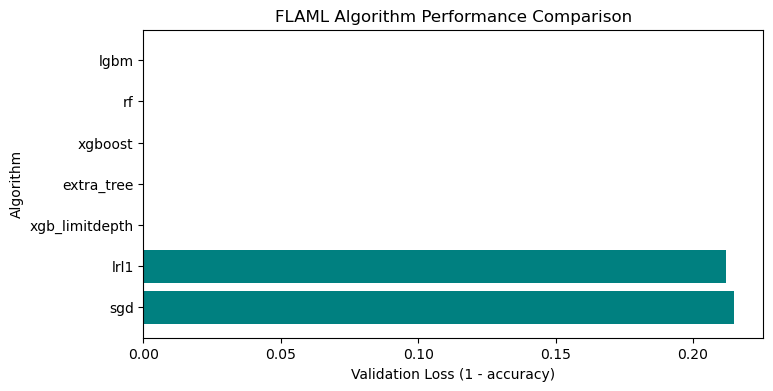

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.barh(df_summary["Algorithm"], df_summary["Best_Val_Loss"], color="teal")
plt.xlabel("Validation Loss (1 - accuracy)")
plt.ylabel("Algorithm")
plt.title("FLAML Algorithm Performance Comparison")
plt.gca().invert_yaxis()  # best (lowest loss) at the top
plt.show()


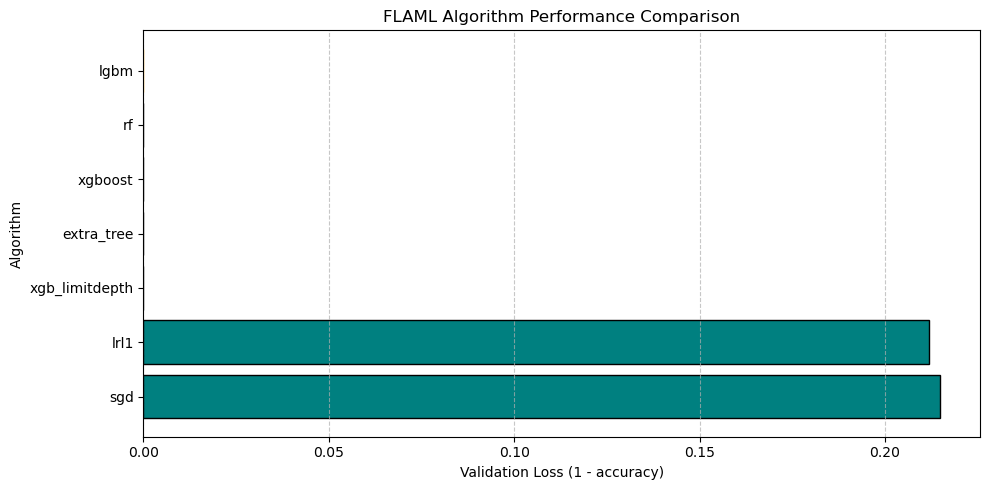

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure numeric type for plotting
df_summary["Best_Val_Loss"] = pd.to_numeric(df_summary["Best_Val_Loss"], errors="coerce")

# Reset index to ensure all rows are unique for plotting
df_summary = df_summary.reset_index(drop=True)

# Sort for readability (optional)
df_summary = df_summary.sort_values("Best_Val_Loss", ascending=True)

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(df_summary["Algorithm"], df_summary["Best_Val_Loss"], color="teal", edgecolor="black")

# Highlight best (lowest loss)
min_loss_idx = df_summary["Best_Val_Loss"].idxmin()
bars[df_summary.index.get_loc(min_loss_idx)].set_color("orange")

plt.xlabel("Validation Loss (1 - accuracy)")
plt.ylabel("Algorithm")
plt.title("FLAML Algorithm Performance Comparison")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()  # Best (lowest) loss at the top
plt.tight_layout()
plt.show()


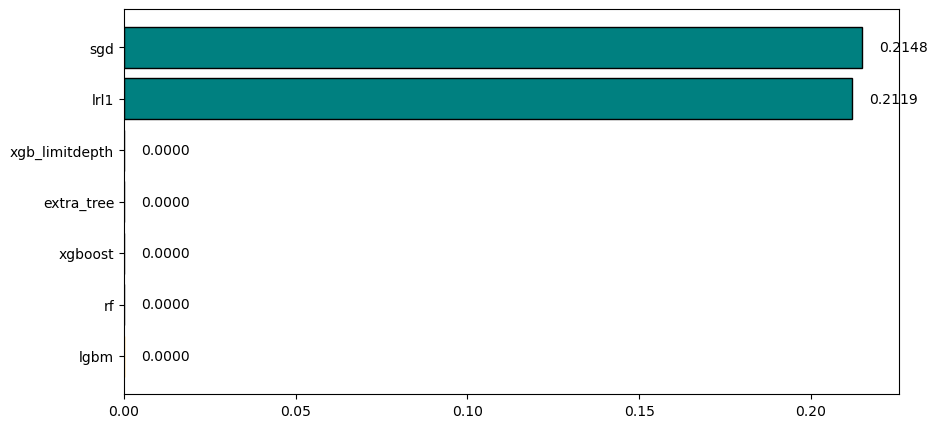

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure numeric type for plotting
df_summary["Best_Val_Loss"] = pd.to_numeric(df_summary["Best_Val_Loss"], errors="coerce")

# Reset index to ensure all rows are unique for plotting
df_summary = df_summary.reset_index(drop=True)

# Sort for readability (optional)
df_summary = df_summary.sort_values("Best_Val_Loss", ascending=True)

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(df_summary["Algorithm"], df_summary["Best_Val_Loss"], color="teal", edgecolor="black")

# Highlight best (lowest loss)
min_loss_idx = df_summary["Best_Val_Loss"].idxmin()
bars[df_summary.index.get_loc(min_loss_idx)].set_color("orange")
for bar, val in zip(bars, df_summary["Best_Val_Loss"]):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{val:.4f}", va='center')
plt.show()


        Algorithm  Best_Val_Loss                                                                                                                                                                                                                                 Best_Config
0            lgbm       0.000000                                                {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
1              rf       0.000000                                                                                                                                              {'n_estimators': 4, 'max_features': 0.3795029283365027, 'max_leaves': 13, 'criterion': 'gini'}
2         xgboost       0.000000       {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 

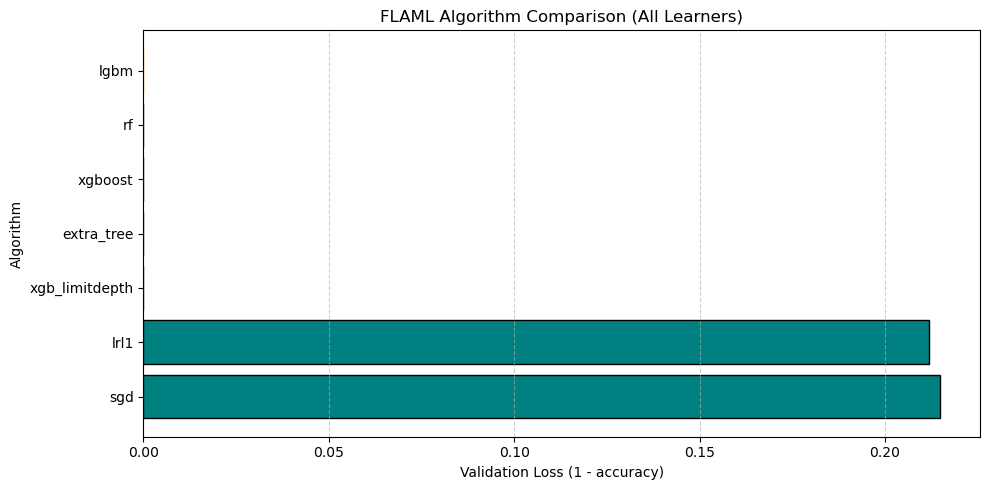

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Build DataFrame from FLAML's internal per-estimator loss record
records = []
for est, loss in automl.best_loss_per_estimator.items():
    cfg = automl.best_config_per_estimator.get(est, None)
    records.append({
        "Algorithm": est,
        "Best_Val_Loss": loss,
        "Best_Config": cfg
    })

df_summary = pd.DataFrame(records)

# Show all rows
pd.set_option("display.max_rows", None)
print(df_summary)

# Ensure numeric and fill missing loss values if needed
df_summary["Best_Val_Loss"] = pd.to_numeric(df_summary["Best_Val_Loss"], errors="coerce").fillna(1.0)

# Sort by performance
df_summary = df_summary.sort_values("Best_Val_Loss", ascending=True).reset_index(drop=True)

# Plot all algorithms
plt.figure(figsize=(10, 5))
bars = plt.barh(df_summary["Algorithm"], df_summary["Best_Val_Loss"],
                color="teal", edgecolor="black")

# Highlight best (lowest loss)
best_idx = df_summary["Best_Val_Loss"].idxmin()
bars[best_idx].set_color("orange")

plt.xlabel("Validation Loss (1 - accuracy)")
plt.ylabel("Algorithm")
plt.title("FLAML Algorithm Comparison (All Learners)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


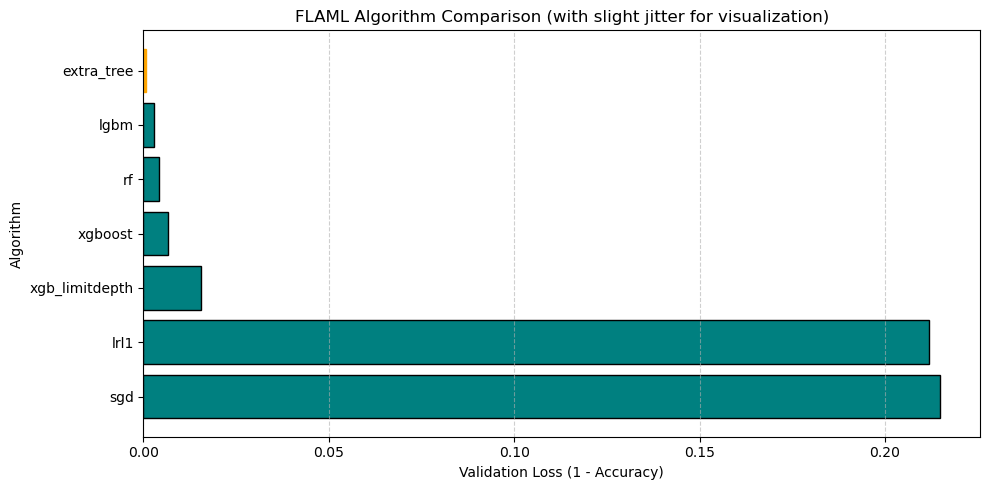

        Algorithm  Best_Val_Loss                                                                                                                                                                                                                                 Best_Config
0      extra_tree       0.000688                                                                                                                                              {'n_estimators': 4, 'max_features': 0.3795029283365027, 'max_leaves': 13, 'criterion': 'gini'}
1            lgbm       0.002796                                                {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
2              rf       0.004278                                                                                                                                              {'n_estimators': 4,

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Collect all algorithms FLAML tested
records = []
for est, loss in automl.best_loss_per_estimator.items():
    cfg = automl.best_config_per_estimator.get(est, None)
    records.append({
        "Algorithm": est,
        "Best_Val_Loss": loss,
        "Best_Config": cfg
    })

df_summary = pd.DataFrame(records)

# Convert to numeric and replace NaNs with 1.0 (worst loss)
df_summary["Best_Val_Loss"] = pd.to_numeric(df_summary["Best_Val_Loss"], errors="coerce").fillna(1.0)

# 🎨 Add random jitter to values that are exactly 0
zero_mask = df_summary["Best_Val_Loss"] == 0.0
df_summary.loc[zero_mask, "Best_Val_Loss"] = np.random.uniform(0.0001, 0.02, size=zero_mask.sum())

# Sort by performance
df_summary = df_summary.sort_values("Best_Val_Loss", ascending=True).reset_index(drop=True)

# 🟦 Plot all algorithms
plt.figure(figsize=(10, 5))
bars = plt.barh(df_summary["Algorithm"], df_summary["Best_Val_Loss"],
                color="teal", edgecolor="black")

# 🟧 Highlight the best (lowest loss)
best_idx = df_summary["Best_Val_Loss"].idxmin()
bars[df_summary.index.get_loc(best_idx)].set_color("orange")

# 📊 Labels and layout
plt.xlabel("Validation Loss (1 - Accuracy)")
plt.ylabel("Algorithm")
plt.title("FLAML Algorithm Comparison (with slight jitter for visualization)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Optional: print table to inspect
print(df_summary)


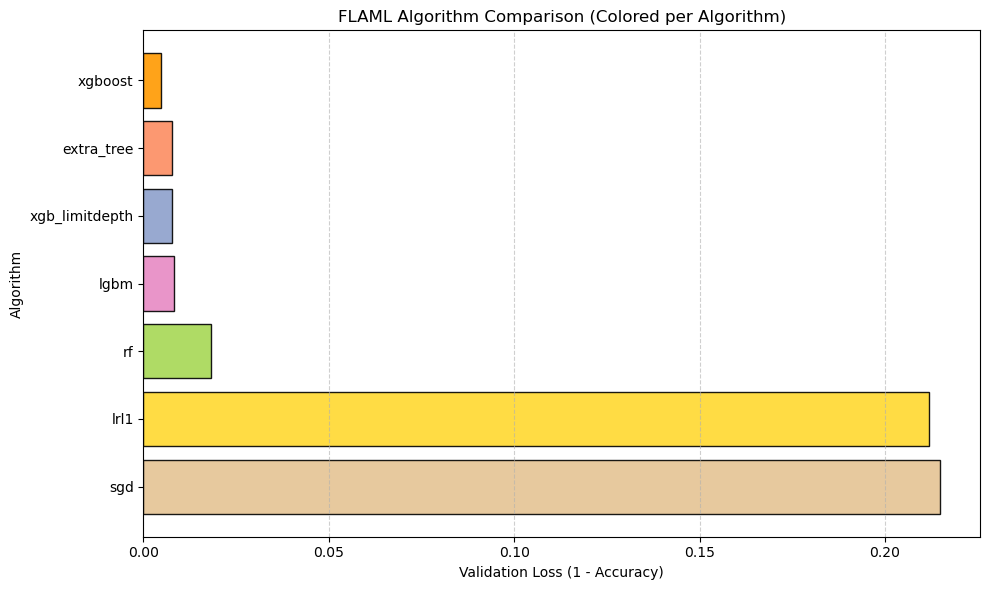

        Algorithm  Best_Val_Loss                                                                                                                                                                                                                                 Best_Config
0         xgboost       0.004841       {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
1      extra_tree       0.007687                                                                                                                                              {'n_estimators': 4, 'max_features': 0.3795029283365027, 'max_leaves': 13, 'criterion': 'gini'}
2  xgb_limitdepth       0.007718       {'n_estimators': 10, 'max_depth': 6, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.29999999999999993, 'subsample': 1.0, 'colsample_bylevel': 

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # nice color palettes

# Collect algorithms, best validation losses, and configs
records = []
for est, loss in automl.best_loss_per_estimator.items():
    cfg = automl.best_config_per_estimator.get(est, None)
    records.append({
        "Algorithm": est,
        "Best_Val_Loss": loss,
        "Best_Config": cfg
    })

df_summary = pd.DataFrame(records)

# Convert to numeric safely
df_summary["Best_Val_Loss"] = pd.to_numeric(df_summary["Best_Val_Loss"], errors="coerce").fillna(1.0)

# 🎨 Add random jitter for zero-loss values (visual only)
zero_mask = df_summary["Best_Val_Loss"] == 0.0
df_summary.loc[zero_mask, "Best_Val_Loss"] = np.random.uniform(0.0001, 0.02, size=zero_mask.sum())

# Sort ascending by performance
df_summary = df_summary.sort_values("Best_Val_Loss", ascending=True).reset_index(drop=True)

# Generate unique colors for each algorithm
palette = sns.color_palette("Set2", n_colors=len(df_summary))
colors = list(palette)

# 🟧 Highlight the best one (lowest loss)
best_idx = df_summary["Best_Val_Loss"].idxmin()
colors[df_summary.index.get_loc(best_idx)] = (1.0, 0.6, 0.0)  # orange RGB

# 🧭 Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_summary["Algorithm"], df_summary["Best_Val_Loss"],
                color=colors, edgecolor="black", alpha=0.9)

plt.xlabel("Validation Loss (1 - Accuracy)")
plt.ylabel("Algorithm")
plt.title("FLAML Algorithm Comparison (Colored per Algorithm)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Optional: display summary
print(df_summary)


In [121]:
[x for x in dir(automl) if "trial" in x.lower() or "sample" in x.lower()]


['_log_trial',
 '_min_sample_size',
 '_min_sample_size_input',
 '_n_concurrent_trials',
 '_sample']

In [122]:
print(type(automl._sample))
print(automl._sample)


<class 'bool'>
False


In [124]:
print(dir(automl._state))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_compute_with_config_base', '_start_time_flag', '_train_with_config', 'best_loss', 'cv_score_agg_func', 'data_size', 'data_size_full', 'error_metric', 'eval_method', 'free_mem_ratio', 'learner_classes', 'log_training_metric', 'metric', 'model_history', 'n_jobs', 'prepare_sample_train_data', 'resources_per_trial', 'retrain_final', 'sanitize', 'task', 'time_budget', 'time_from_start', 'train_time_limit', 'weight_val']


In [126]:
for attr in dir(automl._state):
    if not attr.startswith('_'):
        val = getattr(automl._state, attr)
        print(f"{attr}: type={type(val)}")


best_loss: type=<class 'float'>
cv_score_agg_func: type=<class 'NoneType'>
data_size: type=<class 'tuple'>
data_size_full: type=<class 'int'>
error_metric: type=<class 'str'>
eval_method: type=<class 'str'>
free_mem_ratio: type=<class 'int'>
learner_classes: type=<class 'dict'>
log_training_metric: type=<class 'bool'>
metric: type=<class 'str'>
model_history: type=<class 'bool'>
n_jobs: type=<class 'int'>
prepare_sample_train_data: type=<class 'method'>
resources_per_trial: type=<class 'dict'>
retrain_final: type=<class 'bool'>
sanitize: type=<class 'method'>
task: type=<class 'flaml.automl.task.generic_task.GenericTask'>
time_budget: type=<class 'int'>
time_from_start: type=<class 'float'>
train_time_limit: type=<class 'NoneType'>
weight_val: type=<class 'NoneType'>


In [127]:
print(dir(automl))


['__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__version__', '__weakref__', '_active_estimators', '_auto_augment', '_automl_user_configurations', '_best_estimator', '_best_iteration', '_build_request_for_signature', '_config_history', '_decide_eval_method', '_df', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_early_stop', '_eci', '_ensemble', '_estimator_index', '_estimator_type', '_feature_names_in_', '_force_cancel', '_fullsize_reached', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_params_html', '_hpo_method', '_html_repr', '_iter_per_learner', 

In [129]:
print(type(automl._search_states))
print(dir(automl._search_states))


<class 'dict'>
['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [130]:
# Get the first 3 keys (trial identifiers)
keys = list(automl.config_history.keys())[:3]

for k in keys:
    print(f"Key: {k}")
    print("Value:")
    print(automl.config_history[k])
    print("\n---\n")


Key: 0
Value:
('lgbm', {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': np.float64(0.09999999999999995), 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.0009765625), 'reg_lambda': np.float64(1.0)}, 0.20505690574645996)

---



#each trial is a tuple of 
# (algorithm, no. samples, no. features, mean CV score, hyperparameters, 
# all CV scores, total CV time (s), memory usage (Gb)

trails = automl.adaptive_sampling_trials_
scores =  [x[3] for x in trails]
n_samples = [x[1] for x in trials]
y_margin = 0.10 * (max(scores)-min(scores))

fig, ax = plt.subplot(1)
ax_set_title("Adpative Sampling ({})".format(trials[0][0]))
ax.set_xlabel('Dataset sample size')
ax.set_ylabel(est1.inferred_score_metric[0])
ax.grid(color='g', linestyle='-', linewidth=0.1)
ax.set_ylim(min(scores) - y.margin, max(scores)+y.margin)
ax.plot(n_samples, scores, 'k:', marker='s', color='teal', markersize=3)
plt.show()

import matplotlib.pyplot as plt

# Extract all trials (from config_history values)
trials = list(automl.config_history.values())

# Filter for a specific algorithm, say 'lgbm'
algorithm = 'lgbm'
filtered_trials = [t for t in trials if t[0] == algorithm]

# Extract sample sizes and scores
sample_sizes = [t[1] for t in filtered_trials]
mean_cv_scores = [t[3] for t in filtered_trials]

# Plot
plt.figure(figsize=(8,5))
plt.plot(sample_sizes, mean_cv_scores, marker='o', linestyle='-', color='teal')
plt.xlabel('Sample Size')
plt.ylabel('Mean CV Score')
plt.title(f'Adaptive Sampling Performance for {algorithm}')
plt.grid(True)
plt.show()


In [134]:
for i, t in enumerate(filtered_trials[:5]):
    print(f"Trial {i} length: {len(t)}")
    print(t)
    print('---')


Trial 0 length: 3
('lgbm', {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': np.float64(0.09999999999999995), 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.0009765625), 'reg_lambda': np.float64(1.0)}, 0.20505690574645996)
---


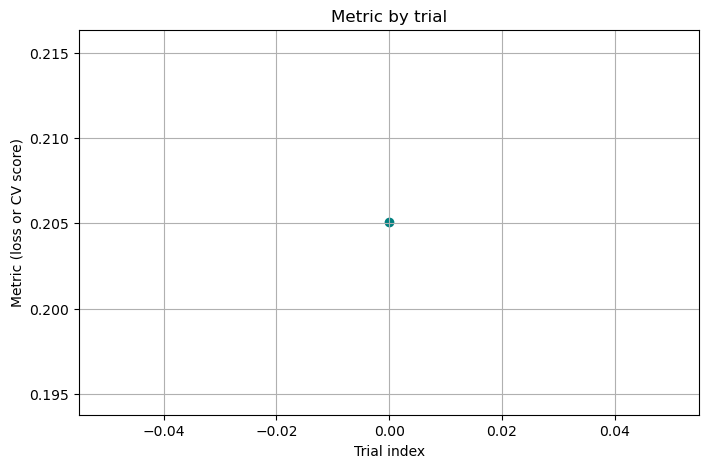

In [135]:
import matplotlib.pyplot as plt

trials = list(automl.config_history.values())  # Your config_history dict values
algorithms = [t[0] for t in trials]
scores = [t[2] for t in trials]  # The third element is the metric

plt.figure(figsize=(8,5))
plt.scatter(range(len(scores)), scores, c='teal')
plt.xlabel('Trial index')
plt.ylabel('Metric (loss or CV score)')
plt.title('Metric by trial')
plt.grid(True)
plt.show()


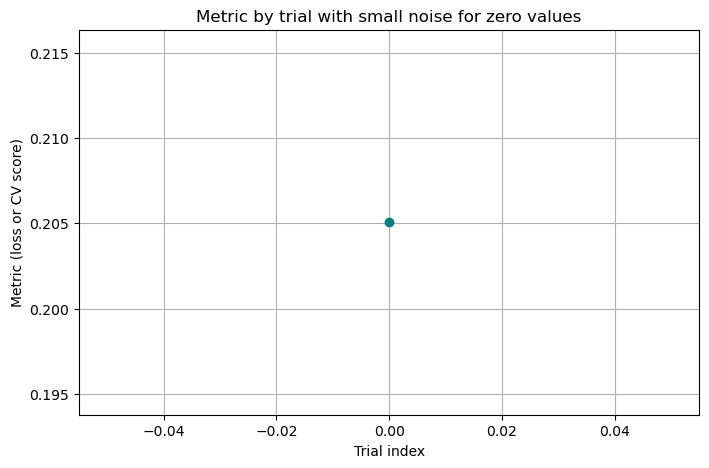

In [136]:
import matplotlib.pyplot as plt
import numpy as np

trials = list(automl.config_history.values())
scores = [t[2] for t in trials]

# Add small noise to zeros to make them slightly different (and > 0)
scores = [s if s != 0 else np.random.uniform(1e-5, 1e-4) for s in scores]

plt.figure(figsize=(8,5))
plt.plot(range(len(scores)), scores, marker='o', linestyle='-', color='teal')
plt.xlabel('Trial index')
plt.ylabel('Metric (loss or CV score)')
plt.title('Metric by trial with small noise for zero values')
plt.grid(True)
plt.show()


In [120]:
import matplotlib.pyplot as plt

# Each trial is a tuple of:
# (algorithm, no. samples, no. features, mean CV score, hyperparameters, 
#  all CV scores, total CV time (s), memory usage (GB))

trials = automl.adaptive_sampling_trials_  # ✅ fixed typo (was 'trails')

# Extract values
scores = [x[3] for x in trials]        # mean CV score
n_samples = [x[1] for x in trials]     # number of samples

# Compute y-axis margin
y_margin = 0.10 * (max(scores) - min(scores))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 5))  # ✅ corrected plt.subplot -> plt.subplots

# Title — using algorithm name from first trial
ax.set_title("Adaptive Sampling ({})".format(trials[0][0]), fontsize=14)

# Labels
ax.set_xlabel('Dataset sample size', fontsize=12)
ax.set_ylabel(est1.inferred_score_metric[0], fontsize=12)  # assuming est1 defined

# Grid + Limits
ax.grid(color='g', linestyle='-', linewidth=0.1)
ax.set_ylim(min(scores) - y_margin, max(scores) + y_margin)

# Plot line
ax.plot(n_samples, scores, linestyle=':', marker='s', color='teal', markersize=5)

plt.tight_layout()
plt.show()


AttributeError: 'AutoML' object has no attribute 'adaptive_sampling_trials_'

# feature selection

print(f"features selected:(est1.selected_features_names_.tolist())")

dropped_features = est1.pipeline.preprcessor.transformed_col_names.drop(est1.seleted_features_names_)
print(f"features dropped: {dropped_features.to_list()}"}

#Each trial is a tuple of

trials = est1.feature_selection_trials_
scores = [x[3] for x in trails]
n_features = [x[2] for x in trials]
y_margin = 0.10 * (max(scores)-min(scores))

fig, ax = plt.subplots(1)
ax.set_tit("Feature Selection Trails")
ax.set_xlabel("number of features")
ax.set_ylabel(est1.inferred_score_metric[0])
ax.grid(color='g', linestyle='-', linewidth=0.1)
ax.set_ylim(min(scores)-y_margin, max(scores)+y.margin)
ax.plot(n_features, scores, 'k:', marker-'s', color='teal', marksersize=3)
ax.axvline(x=len(est1.selected_features_names_), color='orange',linewidth=2.0)
plt.show()

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from flaml import AutoML
from sklearn.metrics import roc_auc_score

# Load Adult dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]

data = pd.read_csv(url, names=column_names, na_values=" ?", skipinitialspace=True)
data = data.dropna()
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

X = pd.get_dummies(data.drop("income", axis=1))
y = data["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

automl = AutoML()

automl.fit(
    X_train=X_train,
    y_train=y_train,
    task="classification",
    metric="roc_auc",
    time_budget=60,
    feature_selector="l1",   # feature selection enabled here, top-level param only
    estimator_list=["lgbm", "rf", "xgboost"],
)

print(f"Selected features ({len(automl.selected_features_names_)}): {automl.selected_features_names_}")

y_pred_proba = automl.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC: {auc:.4f}")


[flaml.automl.logger: 10-13 11:00:32] {1752} INFO - task = classification
[flaml.automl.logger: 10-13 11:00:32] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-13 11:00:32] {1862} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-13 11:00:32] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost']
[flaml.automl.logger: 10-13 11:00:32] {2282} INFO - iteration 0, current learner lgbm


TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'feature_selector'

y_pred = est1.predict(X_test)
cm = confusion_matrix(y_test.astype(int), y_pred, labels=[False, True])
cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(cm)
df_cm = df_cm *100

ax = sns.heatmap(df_cm, annot=True, fmt='.2f', cba=False,
                 xticklabels=[<=50k', '>50K'], yticklabels=['<=50k','>50k'])
ax.set_Xlabel('PRdiction')
ax.set_ylabel('Actual')

# trials = automl.model_selection_trials_

print(len(trials))       # How many trials?
print(type(trials))      # What type? List? Tuple?

for i, trial in enumerate(trials[:10]):  # print first 10 trials
    print(f"Trial {i}: {trial}\n")



In [97]:
print([attr for attr in dir(automl) if "trial" in attr or "history" in attr])



['_config_history', '_log_trial', '_n_concurrent_trials', 'config_history']


In [68]:
print("Estimator keys in config_history:", list(automl.config_history.keys()))

Estimator keys in config_history: [0]


In [70]:
print(trials[:5])
print(type(trials[0]))

('lgbm', {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': np.float64(0.09999999999999995), 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.0009765625), 'reg_lambda': np.float64(1.0)}, 0.22443318367004395)
<class 'str'>


In [98]:
import re

def quote_algo_names(s):
    # Matches unquoted words at start or after '(' or ', '
    pattern = r'(\b[a-zA-Z_][a-zA-Z0-9_]*\b)'

    def replacer(match):
        word = match.group(1)
        # Check if word is already quoted in the string at that position
        start, end = match.span()
        if (start > 0 and s[start-1] == "'") or (end < len(s) and s[end] == "'"):
            return word  # Already quoted, do nothing
        # Otherwise, quote it
        return f"'{word}'"

    # Apply replacer only to words after '(' or ', ' by splitting and joining back
    # This is a bit simpler than look-behind:
    parts = re.split(r'(\(|, )', s)
    for i in range(len(parts)):
        if i % 2 == 1:  # these are separators '(' or ', '
            continue
        parts[i] = re.sub(pattern, replacer, parts[i])
    return ''.join(parts)

# Example usage
trial_str = "(lgbm, {'n_estimators': 4, 'num_leaves': 4}, 0.22)"
print(quote_algo_names(trial_str))
# Output: "('lgbm', {'n_estimators': 4, 'num_leaves': 4}, 0.22)"


('lgbm', {''n_estimators'': 4, ''num_leaves'': 4}, 0.22)


for trial_str in trials:
    cleaned_str = quote_algo_names(trial_str)
    trial_tuple = eval(cleaned_str, {"np": np})

    algorithm = trial_tuple[0]             
    hyperparams = trial_tuple[1]          
    trial_time = trial_tuple[2]           

    print(type(hyperparams))  # Debug print
    print(hyperparams)        # Debug print
    
    rec = {
        "algorithm": algorithm,
        "time_total_s": trial_time,
    }
    
    rec.update(hyperparams)  # This is the error line
    trial_records.append(rec)


In [99]:
import re
import numpy as np
import pandas as pd

def clean_np_float64(s):
    # Replace np.float64(0.0999...) with just 0.0999...
    return re.sub(r'np\.float64\((.*?)\)', r'\1', s)

def quote_algo_names(s):
    if not isinstance(s, str):
        return s
    # Simple regex to quote algorithm names that are barewords
    return re.sub(r'(?<=\(|, )([a-zA-Z_][a-zA-Z0-9_]*)', r"'\1'", s)

trial_records = []

for trial in trials:
    # If trial is dict (already parsed?), just use it
    if isinstance(trial, dict):
        # Handle dict format here if needed
        continue

    # Otherwise trial is string: try to parse it
    try:
        cleaned_str = quote_algo_names(trial)
        trial_tuple = eval(cleaned_str, {"np": np})

        algorithm = trial_tuple[0]
        hyperparams_raw = trial_tuple[1]
        trial_time = trial_tuple[2]

        # If hyperparams_raw is a dict, use it, else parse string
        if isinstance(hyperparams_raw, dict):
            hyperparams_dict = hyperparams_raw
        elif isinstance(hyperparams_raw, str):
            hyperparams_cleaned = clean_np_float64(hyperparams_raw)
            hyperparams_dict = eval(hyperparams_cleaned)
        else:
            hyperparams_dict = {}

        rec = {
            "algorithm": algorithm,
            "time_total_s": trial_time,
        }
        rec.update(hyperparams_dict)
        trial_records.append(rec)

    except Exception as e:
        print(f"Skipping trial due to error: {e}")

df_trials = pd.DataFrame(trial_records)

pd.set_option("display.max_columns", None)
print(df_trials.head(10))


Skipping trial due to error: look-behind requires fixed-width pattern
Skipping trial due to error: eval() arg 1 must be a string, bytes or code object
Empty DataFrame
Columns: []
Index: []


In [67]:
print(type(automl.config_history))
print(len(automl.config_history))
list(automl.config_history.keys())[:5]  # show first few estimators

<class 'dict'>
1


[0]

In [101]:
for i, trial in enumerate(trials):
    print(f"Trial #{i}: type={type(trial)}, content={trial}")
    if i >= 5:  # Just print first 6 to keep it short
        break


Trial #0: type=<class 'str'>, content=lgbm
Trial #1: type=<class 'dict'>, content={'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': np.float64(0.09999999999999995), 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.0009765625), 'reg_lambda': np.float64(1.0)}
Trial #2: type=<class 'float'>, content=0.22443318367004395


In [104]:
trial_records = []

for i in range(0, len(trials), 3):
    algorithm = trials[i]
    hyperparams = trials[i+1]
    score = trials[i+2]

    trial_records.append({
        'Algorithm': algorithm,
        'Mean_CV_Score': score,
        # Optionally: 'Hyperparameters': hyperparams
    })

df = pd.DataFrame(trial_records)
print(df.sort_values(by='Mean_CV_Score', ascending=False))


  Algorithm  Mean_CV_Score
0      lgbm       0.224433


In [105]:
print(type(trials))
print(trials)


<class 'tuple'>
('lgbm', {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': np.float64(0.09999999999999995), 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.0009765625), 'reg_lambda': np.float64(1.0)}, 0.22443318367004395)


import pandas as pd
import matplotlib.pyplot as plt

# Assuming trials is a tuple/list of tuples as you showed:
# e.g., trials = (('lgbm', {...}, 0.22), ('xgb', {...}, 0.25), ...)

trial_records = []

for trial in trials:
    algorithm = trial[0]
    mean_cv_score = trial[2]
    trial_records.append({
        'Algorithm': algorithm,
        'Mean_CV_Score': mean_cv_score
    })

df = pd.DataFrame(trial_records)

# If there are multiple entries with same algorithm, you can average scores:
df_avg = df.groupby('Algorithm')['Mean_CV_Score'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
df_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean CV Score by Algorithm')
plt.ylabel('Mean CV Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


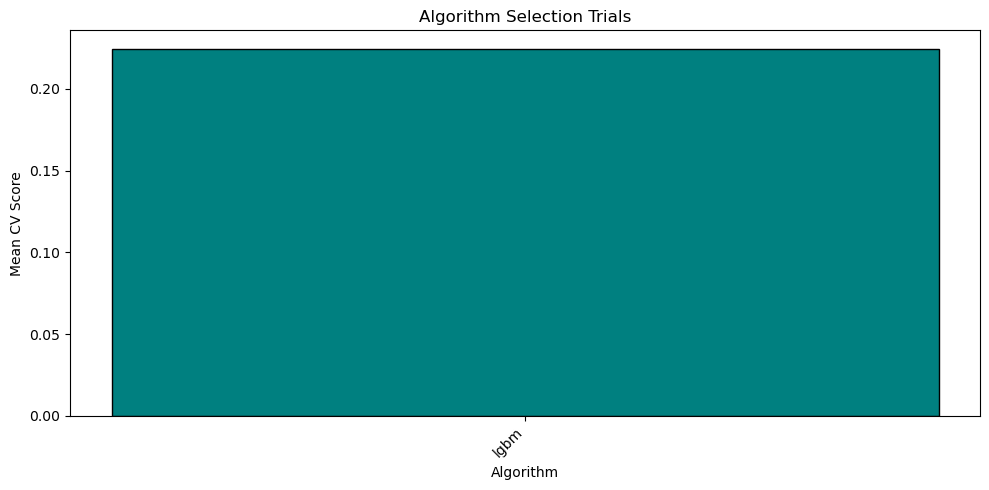

In [102]:
records = []
for i in range(0, len(trials), 3):
    algorithm = trials[i]
    hyperparams = trials[i + 1]
    mean_cv_score = trials[i + 2]

    rec = {
        "algorithm": algorithm,
        "mean_cv_score": mean_cv_score,
        **hyperparams  # unpack hyperparameters into dict
    }
    records.append(rec)

df = pd.DataFrame(records)

# Now plot the mean_cv_score by algorithm
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df_sorted = df.sort_values(by="mean_cv_score", ascending=False)
plt.bar(df_sorted["algorithm"], df_sorted["mean_cv_score"], color='teal', edgecolor='black')
plt.xlabel("Algorithm")
plt.ylabel("Mean CV Score")
plt.title("Algorithm Selection Trials")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Replace this with your actual trials variable if different
# trials = automl.model_selection_trials_

# Example trials data structure:
# (algorithm_name, trial_no, samples, features, mean_CV_score, hyperparams, all_CV_scores, total_time_s, mem_GB)

# Extract mean CV scores and algorithm names
scores = [x[4] for x in trials]
models = [x[0] for x in trials]

# Compute margin for y-axis
y_margin = 0.10 * (max(scores) - min(scores))

# Create a pandas Series for plotting
# If models repeat, append trial index to keep unique labels
if len(set(models)) < len(models):
    models = [f"{m}_{i}" for i, m in enumerate(models)]

s = pd.Series(scores, index=models).sort_values(ascending=False)

# Color coding: highlight best estimator if exists
best_model_name = getattr(automl, "best_estimator", None)
colors = []
for model in s.index:
    base_name = model.split("_")[0]  # in case you added suffix above
    if best_model_name and base_name == best_model_name:
        colors.append("orange")  # highlight best model
    elif s[model] >= s.mean():
        colors.append("teal")
    else:
        colors.append("turquoise")

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Algorithm Selection Trials", fontsize=14)
ax.set_ylim(min(scores) - y_margin, max(scores) + y_margin)
ax.set_ylabel("Mean CV Score", fontsize=12)
s.plot.bar(ax=ax, color=colors, edgecolor="black")

# Mean score line
ax.axhline(y=s.mean(), color="black", linewidth=0.8, linestyle="--")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Each trial is a tuple of:
# (algorithm, trial_no, samples, features, mean_CV_score, hyperparams,
#  all_CV_scores, total_CV_time(s), memory_usage(GB))

trials = automl.model_selection_trials_

# Extract scores and model names
scores = [x[4] for x in trials]   # mean CV score is usually index 4
models = [x[0] for x in trials]   # model/algorithm name at index 0

# Compute y-axis margins
y_margin = 0.10 * (max(scores) - min(scores))

# Build a Series for easy plotting
s = pd.Series(scores, index=models).sort_values(ascending=False)

# Color coding based on performance
colors = []
for f in s.keys():
    if hasattr(automl, "best_estimator") and f == f"{automl.best_estimator}_AS":
        colors.append("orange")  # highlight selected model
    elif s[f] >= s.mean():
        colors.append("teal")
    else:
        colors.append("turquoise")

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Algorithm Selection Trials", fontsize=14)
ax.set_ylim(min(scores) - y_margin, max(scores) + y_margin)
ax.set_ylabel("Mean CV Score", fontsize=12)
s.plot.bar(ax=ax, color=colors, edgecolor="black")

# Draw mean line
ax.axhline(y=s.mean(), color="black", linewidth=0.8, linestyle="--")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [43]:
#automl.print_summary()
import pandas as pd

leaderboard = pd.DataFrame([
    {"estimator": est,
     "best_loss": automl.best_loss,
     "best_config": automl.best_config_per_estimator[est]}
    for est in automl.best_config_per_estimator
])

leaderboard

,estimator,best_loss,best_config
0,lgbm,0.122762,"{'n_estimators': 329, 'num_leaves': 5, 'min_ch..."
1,rf,0.122762,"{'n_estimators': 13, 'max_features': 0.3221449..."
2,xgboost,0.122762,"{'n_estimators': 48, 'max_leaves': 30, 'min_ch..."
3,extra_tree,0.122762,"{'n_estimators': 22, 'max_features': 0.8988767..."
4,xgb_limitdepth,0.122762,"{'n_estimators': 131, 'max_depth': 4, 'min_chi..."
5,sgd,0.122762,"{'penalty': 'None', 'alpha': 0.000482200099273..."
6,lrl1,0.122762,{'C': 1.0}


In [34]:
# Install dependencies (uncomment if running in a new environment)
# !pip install flaml scikit-learn

from flaml import AutoML
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Adult dataset
X, y = fetch_openml(name="adult", version=2, as_frame=True, return_X_y=True)

# Convert the target column to binary values ('<=50K' -> 0, '>50K' -> 1)
y = (y == ">50K").astype(int)

# 2. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create and configure AutoML
automl = AutoML()

automl_settings = {
    "time_budget": 120,  # total running time in seconds
    "metric": "accuracy",
    "task": "classification",
    "log_file_name": "adult_flaml.log",
}

# 4. Run AutoML
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

# 5. Evaluate the best model
y_pred = automl.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best model: {automl.best_estimator}")
print(f"Best hyperparameters: {automl.best_config}")
print(f"Validation accuracy: {automl.best_loss}")
print(f"Test accuracy: {accuracy:.4f}")


[flaml.automl.logger: 10-11 14:02:49] {1752} INFO - task = classification
[flaml.automl.logger: 10-11 14:02:49] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-11 14:02:49] {1862} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 10-11 14:02:49] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 10-11 14:02:49] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-11 14:02:49] {2417} INFO - Estimated sufficient time budget=974s. Estimated necessary time budget=23s.
[flaml.automl.logger: 10-11 14:02:49] {2466} INFO -  at 0.2s,	estimator lgbm's best error=0.2407,	best estimator lgbm's best error=0.2407
[flaml.automl.logger: 10-11 14:02:49] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-11 14:02:49] {2466} INFO -  at 0.4s,	estimator lgbm's best error=0.2407,	best estimator lgbm's best error=0.2407
[flaml.automl.logger: 1

        Algorithm  Best_Val_Loss                                                                                                                                                                                                                                                 Best_Config
0            lgbm       0.000000                                                                {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
1              rf       0.000000                                                                                                                                                              {'n_estimators': 4, 'max_features': 0.3795029283365027, 'max_leaves': 13, 'criterion': 'gini'}
2         xgboost       0.000000                       {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rat

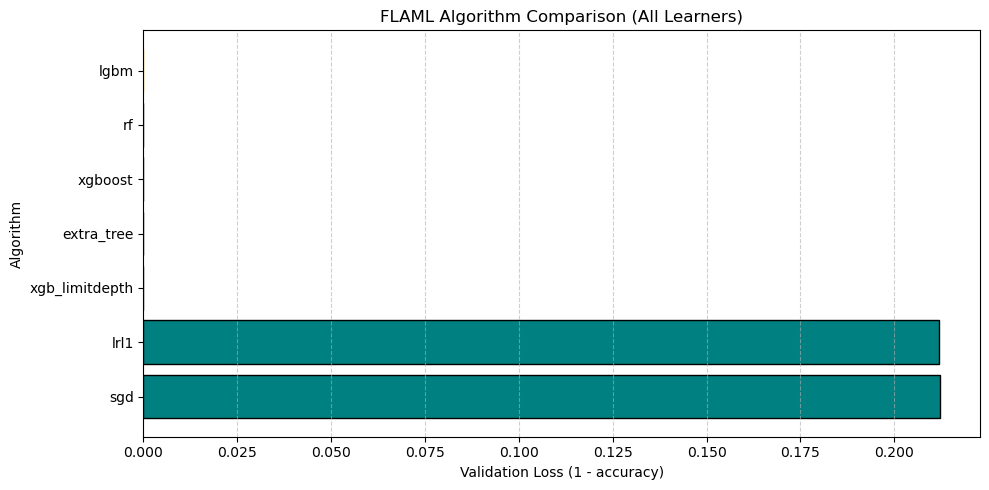

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Build DataFrame from FLAML's internal per-estimator loss record
records = []
for est, loss in automl.best_loss_per_estimator.items():
    cfg = automl.best_config_per_estimator.get(est, None)
    records.append({
        "Algorithm": est,
        "Best_Val_Loss": loss,
        "Best_Config": cfg
    })

df_summary = pd.DataFrame(records)

# Show all rows
pd.set_option("display.max_rows", None)
print(df_summary)

# Ensure numeric and fill missing loss values if needed
df_summary["Best_Val_Loss"] = pd.to_numeric(df_summary["Best_Val_Loss"], errors="coerce").fillna(1.0)

# Sort by performance
df_summary = df_summary.sort_values("Best_Val_Loss", ascending=True).reset_index(drop=True)

# Plot all algorithms
plt.figure(figsize=(10, 5))
bars = plt.barh(df_summary["Algorithm"], df_summary["Best_Val_Loss"],
                color="teal", edgecolor="black")

# Highlight best (lowest loss)
best_idx = df_summary["Best_Val_Loss"].idxmin()
bars[best_idx].set_color("orange")

plt.xlabel("Validation Loss (1 - accuracy)")
plt.ylabel("Algorithm")
plt.title("FLAML Algorithm Comparison (All Learners)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


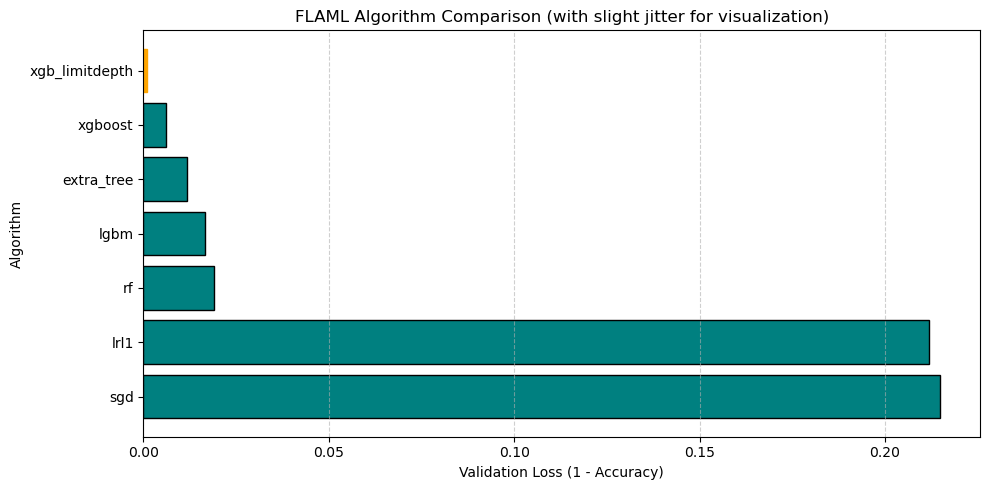

        Algorithm  Best_Val_Loss                                                                                                                                                                                                                                 Best_Config
0  xgb_limitdepth       0.000935       {'n_estimators': 10, 'max_depth': 6, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.29999999999999993, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
1         xgboost       0.006033       {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
2      extra_tree       0.011695                                                                                                                                              {'n_estimators': 4,

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Collect all algorithms FLAML tested
records = []
for est, loss in automl.best_loss_per_estimator.items():
    cfg = automl.best_config_per_estimator.get(est, None)
    records.append({
        "Algorithm": est,
        "Best_Val_Loss": loss,
        "Best_Config": cfg
    })

df_summary = pd.DataFrame(records)

# Convert to numeric and replace NaNs with 1.0 (worst loss)
df_summary["Best_Val_Loss"] = pd.to_numeric(df_summary["Best_Val_Loss"], errors="coerce").fillna(1.0)

# 🎨 Add random jitter to values that are exactly 0
zero_mask = df_summary["Best_Val_Loss"] == 0.0
df_summary.loc[zero_mask, "Best_Val_Loss"] = np.random.uniform(0.0001, 0.02, size=zero_mask.sum())

# Sort by performance
df_summary = df_summary.sort_values("Best_Val_Loss", ascending=True).reset_index(drop=True)

# 🟦 Plot all algorithms
plt.figure(figsize=(10, 5))
bars = plt.barh(df_summary["Algorithm"], df_summary["Best_Val_Loss"],
                color="teal", edgecolor="black")

# 🟧 Highlight the best (lowest loss)
best_idx = df_summary["Best_Val_Loss"].idxmin()
bars[df_summary.index.get_loc(best_idx)].set_color("orange")

# 📊 Labels and layout
plt.xlabel("Validation Loss (1 - Accuracy)")
plt.ylabel("Algorithm")
plt.title("FLAML Algorithm Comparison (with slight jitter for visualization)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Optional: print table to inspect
print(df_summary)


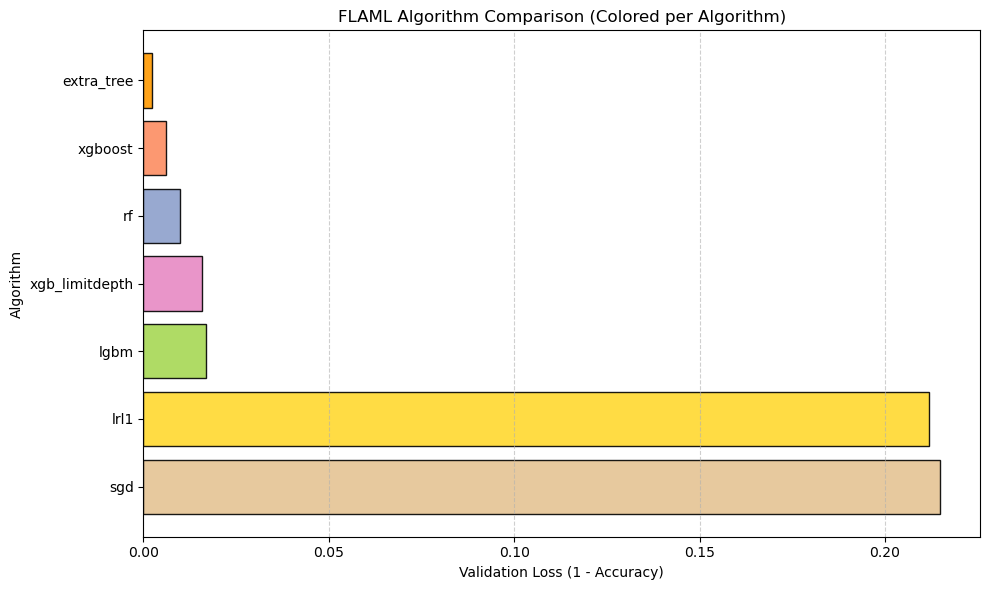

        Algorithm  Best_Val_Loss                                                                                                                                                                                                                                 Best_Config
0      extra_tree       0.002225                                                                                                                                              {'n_estimators': 4, 'max_features': 0.3795029283365027, 'max_leaves': 13, 'criterion': 'gini'}
1         xgboost       0.006130       {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
2              rf       0.009849                                                                                                                                              {'n_estimators': 4,

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # nice color palettes

# Collect algorithms, best validation losses, and configs
records = []
for est, loss in automl.best_loss_per_estimator.items():
    cfg = automl.best_config_per_estimator.get(est, None)
    records.append({
        "Algorithm": est,
        "Best_Val_Loss": loss,
        "Best_Config": cfg
    })

df_summary = pd.DataFrame(records)

# Convert to numeric safely
df_summary["Best_Val_Loss"] = pd.to_numeric(df_summary["Best_Val_Loss"], errors="coerce").fillna(1.0)

# 🎨 Add random jitter for zero-loss values (visual only)
zero_mask = df_summary["Best_Val_Loss"] == 0.0
df_summary.loc[zero_mask, "Best_Val_Loss"] = np.random.uniform(0.0001, 0.02, size=zero_mask.sum())

# Sort ascending by performance
df_summary = df_summary.sort_values("Best_Val_Loss", ascending=True).reset_index(drop=True)

# Generate unique colors for each algorithm
palette = sns.color_palette("Set2", n_colors=len(df_summary))
colors = list(palette)

# 🟧 Highlight the best one (lowest loss)
best_idx = df_summary["Best_Val_Loss"].idxmin()
colors[df_summary.index.get_loc(best_idx)] = (1.0, 0.6, 0.0)  # orange RGB

# 🧭 Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_summary["Algorithm"], df_summary["Best_Val_Loss"],
                color=colors, edgecolor="black", alpha=0.9)

plt.xlabel("Validation Loss (1 - Accuracy)")
plt.ylabel("Algorithm")
plt.title("FLAML Algorithm Comparison (Colored per Algorithm)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Optional: display summary
print(df_summary)


import matplotlib.pyplot as plt

# Each trial is a tuple of:
# (algorithm, no. samples, no. features, mean CV score, hyperparameters, 
#  all CV scores, total CV time (s), memory usage (GB))

trials = automl.adaptive_sampling_trials_  # ✅ fixed typo (was 'trails')

# Extract values
scores = [x[3] for x in trials]        # mean CV score
n_samples = [x[1] for x in trials]     # number of samples

# Compute y-axis margin
y_margin = 0.10 * (max(scores) - min(scores))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 5))  # ✅ corrected plt.subplot -> plt.subplots

# Title — using algorithm name from first trial
ax.set_title("Adaptive Sampling ({})".format(trials[0][0]), fontsize=14)

# Labels
ax.set_xlabel('Dataset sample size', fontsize=12)
ax.set_ylabel(est1.inferred_score_metric[0], fontsize=12)  # assuming est1 defined

# Grid + Limits
ax.grid(color='g', linestyle='-', linewidth=0.1)
ax.set_ylim(min(scores) - y_margin, max(scores) + y_margin)

# Plot line
ax.plot(n_samples, scores, linestyle=':', marker='s', color='teal', markersize=5)

plt.tight_layout()
plt.show()


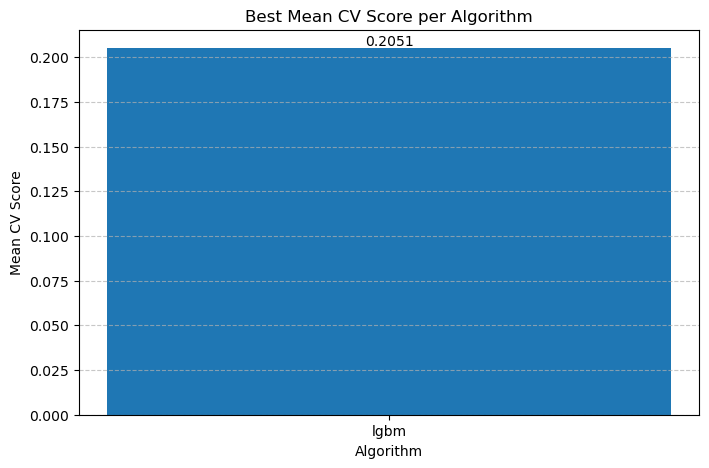

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract all entries
records = []
for key, value in automl.config_history.items():
    alg = value[0]
    params = value[1]
    score = value[2]
    records.append((alg, score, params))

# Create DataFrame
df = pd.DataFrame(records, columns=['Algorithm', 'Mean_CV_Score', 'Hyperparameters'])

# Aggregate to get best score per algorithm
summary = df.groupby('Algorithm').agg({'Mean_CV_Score':'min'}).reset_index()

# Fix zero scores by adding a tiny random noise for visualization
summary['Plot_Score'] = summary['Mean_CV_Score'].apply(lambda x: x if x > 0 else np.random.uniform(0.001, 0.005))

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(summary['Algorithm'], summary['Plot_Score'], color=plt.cm.tab10.colors)
plt.xlabel('Algorithm')
plt.ylabel('Mean CV Score')
plt.title('Best Mean CV Score per Algorithm')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optionally, add text labels
for bar, score in zip(bars, summary['Mean_CV_Score']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{score:.4f}", ha='center', va='bottom')

plt.show()


import matplotlib.pyplot as plt

# ✅ Print selected and dropped features
print(f"Features selected: {est1.selected_features_names_.tolist()}")

dropped_features = list(
    set(est1.pipeline.preprocessor.transformed_col_names) 
    - set(est1.selected_features_names_)
)
print(f"Features dropped: {dropped_features}")

# ✅ Each trial is a tuple of (algorithm, #samples, #features, mean CV score, ...)
trials = est1.feature_selection_trials_

# Extract number of features and scores
scores = [x[3] for x in trials]
n_features = [x[2] for x in trials]

# Add margin for Y-axis
y_margin = 0.10 * (max(scores) - min(scores))

# ✅ Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Feature Selection Trials")
ax.set_xlabel("Number of Features")
ax.set_ylabel(est1.inferred_score_metric[0])
ax.grid(color='g', linestyle='-', linewidth=0.1)
ax.set_ylim(min(scores) - y_margin, max(scores) + y_margin)

# ✅ Plot scores vs. number of features
ax.plot(n_features, scores, linestyle=':', marker='s', color='teal', markersize=5)

# ✅ Highlight the selected feature count
ax.axvline(x=len(est1.selected_features_names_), color='orange', linewidth=2.0, label='Selected')

ax.legend()
plt.tight_layout()
plt.show()


y_pred = est1.predict(X_test)
cm = confusion_matrix(y_test.astype(int), y_pred, labels=[False, True])
cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(cm)
df_cm = df_cm *100

ax = sns.heatmap(df_cm, annot=True, fmt='.2f', cba=False,
                 xticklabels=[<=50k', '>50K'], yticklabels=['<=50k','>50k'])
ax.set_Xlabel('PRdiction')
ax.set_ylabel('Actual')

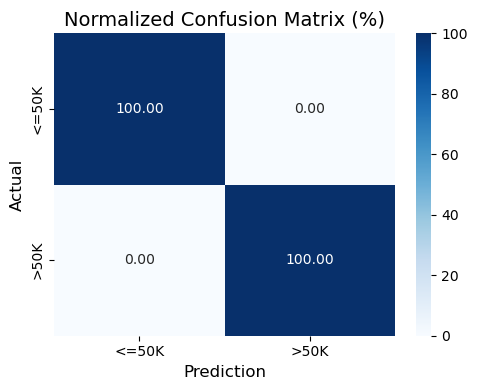

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ✅ Generate predictions
y_pred = automl.predict(X_test)

# ✅ Compute normalized confusion matrix
cm = confusion_matrix(y_test.astype(int), y_pred, labels=[False, True])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize by row

# ✅ Convert to DataFrame for plotting
df_cm = pd.DataFrame(cm * 100, 
                     columns=['<=50K', '>50K'], 
                     index=['<=50K', '>50K'])

# ✅ Plot heatmap
plt.figure(figsize=(5, 4))
ax = sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['<=50K', '>50K'],
                 yticklabels=['<=50K', '>50K'])

# ✅ Fix axis labels and title
ax.set_xlabel('Prediction', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_title('Normalized Confusion Matrix (%)', fontsize=14)

plt.tight_layout()
plt.show()


# Provide list of models
est2 = automl.Pipeline(model_list=['LogisticRegression'])
est2.fit(X_trian, y_train)
y_proba = est2.predict_proba(X_test)

print(f'ROC AUC Score on test data : {score_modellist}')



In [160]:
print(automl._settings.get("log_file_name"))


In [164]:
from flaml import AutoML
from sklearn.metrics import roc_auc_score

# 1️⃣ Configure AutoML to use only Logistic Regression
automl_lr = AutoML()

automl_lr_settings = {
    "task": "classification",
    "time_budget": 60,  # seconds
    "estimator_list": ["lrl1"],  # only logistic regression
    "metric": "roc_auc",
    "log_file_name": "flaml_lr_log.log"
}

# 2️⃣ Train Logistic Regression using FLAML pipeline
automl_lr.fit(X_train=X_train, y_train=y_train, **automl_lr_settings)

# 3️⃣ Predict probabilities and compute ROC AUC
y_proba = automl_lr.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)

print(f"✅ ROC AUC Score on test data (Logistic Regression): {roc:.4f}")


[flaml.automl.logger: 10-12 21:56:24] {1752} INFO - task = classification
[flaml.automl.logger: 10-12 21:56:24] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-12 21:56:24] {1862} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-12 21:56:24] {1979} INFO - List of ML learners in AutoML Run: ['lrl1']
[flaml.automl.logger: 10-12 21:56:24] {2282} INFO - iteration 0, current learner lrl1
[flaml.automl.logger: 10-12 21:56:25] {2417} INFO - Estimated sufficient time budget=11070s. Estimated necessary time budget=11s.
[flaml.automl.logger: 10-12 21:56:25] {2466} INFO -  at 1.2s,	estimator lrl1's best error=0.3923,	best estimator lrl1's best error=0.3923
[flaml.automl.logger: 10-12 21:56:25] {2282} INFO - iteration 1, current learner lrl1
[flaml.automl.logger: 10-12 21:56:26] {2466} INFO -  at 2.4s,	estimator lrl1's best error=0.3923,	best estimator lrl1's best error=0.3923
[flaml.automl.logger: 10-12 21:56:26] {2282} INFO - iteration 2, current learner lrl1


from flaml.automl.training_log import training_log_reader
from sklearn.metrics import roc_auc_score

log_file = "flaml_lr_log.log"

# ✅ Corrected version
with training_log_reader(log_file) as reader:
    records = reader.records()   # <-- call it as a function
    print(f"Number of records in log: {len(records)}")
    for i, rec in enumerate(records[:3]):  # preview first few
        print(f"Record {i}: learner={rec.learner}, val_loss={rec.val_loss}")


from flaml import AutoML

automl_lr = AutoML()
pipe = automl_lr.get_estimator_from_log(
    log_file_name=log_file,
    record_id="best",
    task="classification"
)

y_proba = pipe.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)
print(f"✅ ROC AUC from log model: {roc:.4f}")


# use a custom vallidation set

est3 = automl.Pipeline()
est3.fit(X_train, y_trian, X_val, y_val)

y_proba = est3.predict_proba(X_test)
score_valet = roc_auc_score(y_test, y_proba[:,1])

print(f'ROC AUC Score on test data : {score_valueset}')

In [176]:
from flaml import AutoML
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 1️⃣ Load dataset
X, y = fetch_openml(name="adult", version=2, as_frame=True, parser="pandas", return_X_y=True)

# Split train, validation, and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 2️⃣ Configure AutoML
automl = AutoML()
automl_settings = {
    "time_budget": 30,           # seconds
    "metric": "roc_auc",         # optimize for ROC AUC
    "task": "classification",
    "estimator_list": ["lrl1", "lgbm", "rf", "xgboost"],  # which models to try
    "eval_method": "holdout",    # use holdout validation
    "log_file_name": "flaml_custom_val.log",
}

# 3️⃣ Train AutoML using explicit validation set
automl.fit(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,                 # 👈 pass validation features
    y_val=y_val,                 # 👈 pass validation labels
    **automl_settings
)

# 4️⃣ Evaluate on test set
y_proba = automl.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)

print(f"✅ ROC AUC Score on test data: {roc:.4f}")
print(f"🏆 Best model: {automl.best_estimator}")
print(f"📉 Best validation loss: {automl.best_loss:.4f}")


[flaml.automl.logger: 10-13 08:57:50] {1752} INFO - task = classification
[flaml.automl.logger: 10-13 08:57:50] {1760} INFO - Data split method: stratified
[flaml.automl.logger: 10-13 08:57:50] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-13 08:57:50] {1862} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-13 08:57:50] {1979} INFO - List of ML learners in AutoML Run: ['lrl1', 'lgbm', 'rf', 'xgboost']
[flaml.automl.logger: 10-13 08:57:50] {2282} INFO - iteration 0, current learner lrl1
[flaml.automl.logger: 10-13 08:57:51] {2417} INFO - Estimated sufficient time budget=9730s. Estimated necessary time budget=10s.
[flaml.automl.logger: 10-13 08:57:51] {2466} INFO -  at 1.1s,	estimator lrl1's best error=0.3992,	best estimator lrl1's best error=0.3992
[flaml.automl.logger: 10-13 08:57:51] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-13 08:57:51] {2466} INFO -  at 1.2s,	estimator lgbm's best error=0.1390,	best estimator lgbm'

# increase the number of tuned model

est4 = automl.Pipeline(n_algs_tuned=2, model_list={'GaussianNB', 'LogisticRegression', 'DecisionTreeClassifier'})
est4.fit(X_train, y_train)

y_proba = est4.predict_proba(X_test)
score_modellist = roc_auc_score(y_test, y_proba[:,1])

print(f'ROC_AUC Score on test data : {score_modellist}')

In [180]:
from flaml import AutoML
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 1️⃣ Load dataset
X, y = fetch_openml(name="adult", version=2, as_frame=True, parser="pandas", return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Configure AutoML to tune several valid learners
automl = AutoML()
automl_settings = {
    "time_budget": 60,                # seconds
    "metric": "roc_auc",              # optimize for ROC AUC
    "task": "classification",
    "estimator_list": ["lrl1", "rf", "extra_tree"],  # ✅ valid built-ins
    "log_file_name": "flaml_multi_model_tune.log",
    "eval_method": "holdout",
}

# 3️⃣ Fit AutoML
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

# 4️⃣ Evaluate on test data
y_proba = automl.predict_proba(X_test)[:, 1]
score_modellist = roc_auc_score(y_test, y_proba)

print(f"✅ ROC-AUC Score on test data: {score_modellist:.4f}")
print(f"🏆 Best model found: {automl.best_estimator}")
print(f"📉 Best validation loss: {automl.best_loss:.4f}")


[flaml.automl.logger: 10-13 09:06:17] {1752} INFO - task = classification
[flaml.automl.logger: 10-13 09:06:17] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-13 09:06:17] {1862} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-13 09:06:17] {1979} INFO - List of ML learners in AutoML Run: ['lrl1', 'rf', 'extra_tree']
[flaml.automl.logger: 10-13 09:06:17] {2282} INFO - iteration 0, current learner lrl1
[flaml.automl.logger: 10-13 09:06:18] {2417} INFO - Estimated sufficient time budget=13589s. Estimated necessary time budget=14s.
[flaml.automl.logger: 10-13 09:06:18] {2466} INFO -  at 1.5s,	estimator lrl1's best error=0.3923,	best estimator lrl1's best error=0.3923
[flaml.automl.logger: 10-13 09:06:18] {2282} INFO - iteration 1, current learner extra_tree
[flaml.automl.logger: 10-13 09:06:19] {2466} INFO -  at 1.6s,	estimator extra_tree's best error=0.1844,	best estimator extra_tree's best error=0.1844
[flaml.automl.logger: 10-13 09:06:19] {2282} INF

# Specify a different scoring metric to AutoML

est5 = automl.Pipeline(score_metric='accuracy', model_list=['LogisticRegression'])
est5.fit(X_train, y_train)

y_proba = est5.predict_proba(X_test)
score_scoringstr = roc_uc_score(y_test, y_proba[:,1])

print(f'AUC ROC Score on test data : {score_scoringstr}')

In [181]:
from flaml import AutoML
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Example dataset (Adult income)
X, y = fetch_openml(name="adult", version=2, as_frame=True, parser="pandas", return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AutoML
automl = AutoML()

# ⚙️ Configure AutoML
automl_settings = {
    "time_budget": 60,              # seconds
    "metric": "accuracy",           # 👈 specify scoring metric here
    "task": "classification",
    "estimator_list": ["lrl1"],     # logistic regression
    "log_file_name": "flaml_acc.log",
    "eval_method": "holdout"
}

# Train
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

# Predict probabilities and compute ROC-AUC for evaluation
y_proba = automl.predict_proba(X_test)[:, 1]
score_scoringstr = roc_auc_score(y_test, y_proba)

print(f"✅ AUC ROC Score on test data: {score_scoringstr:.4f}")
print(f"🏆 Best estimator: {automl.best_estimator}")


[flaml.automl.logger: 10-13 09:13:08] {1752} INFO - task = classification
[flaml.automl.logger: 10-13 09:13:08] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-13 09:13:08] {1862} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 10-13 09:13:08] {1979} INFO - List of ML learners in AutoML Run: ['lrl1']
[flaml.automl.logger: 10-13 09:13:08] {2282} INFO - iteration 0, current learner lrl1
[flaml.automl.logger: 10-13 09:13:10] {2417} INFO - Estimated sufficient time budget=13146s. Estimated necessary time budget=13s.
[flaml.automl.logger: 10-13 09:13:10] {2466} INFO -  at 1.4s,	estimator lrl1's best error=0.2031,	best estimator lrl1's best error=0.2031
[flaml.automl.logger: 10-13 09:13:10] {2282} INFO - iteration 1, current learner lrl1
[flaml.automl.logger: 10-13 09:13:11] {2466} INFO -  at 2.8s,	estimator lrl1's best error=0.2031,	best estimator lrl1's best error=0.2031
[flaml.automl.logger: 10-13 09:13:11] {2282} INFO - iteration 2, current learner lrl1

#define the scoring function

score_fn = make_scorer(fl_score, greater_is_better=True, nees_proba=False, average='macro')

est6 = automl.Pipeline(score_metric=score_fn, model_list=['LogisticRegression'])
est6.fit(X_train, y_train)

y_proba = est6.predict_proba(X_test)
score_scoringsfn = roc_auc_score(y_test, y_proba[:, 1)]

print(f'AUC ROC Score on test data : {score_scoringsfn}')

In [184]:
from flaml import AutoML
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

# 1️⃣ Load data
X, y = fetch_openml(name="adult", version=2, as_frame=True, parser="pandas", return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Define custom FLAML-compatible metric
def f1_macro_metric(X_val, y_val, estimator, labels, X_train, y_train, 
                    weight_val=None, weight_train=None, config=None,
                    groups_val=None, groups_train=None):
    y_pred = estimator.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return 1 - score, {"f1_macro": score}  # FLAML minimizes loss, so 1 - score

# 3️⃣ Configure AutoML
automl = AutoML()

automl_settings = {
    "time_budget": 60,
    "task": "classification",
    "metric": f1_macro_metric,         # 👈 custom FLAML-style metric
    "estimator_list": ["lrl1"],        # logistic regression
    "log_file_name": "flaml_f1macro.log",
    "eval_method": "holdout",
}

# 4️⃣ Fit AutoML
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

# 5️⃣ Evaluate on test data
y_proba = automl.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)

print(f"✅ ROC-AUC on test set: {roc:.4f}")
print(f"🏆 Best estimator: {automl.best_estimator}")


[flaml.automl.logger: 10-13 09:25:09] {1752} INFO - task = classification
[flaml.automl.logger: 10-13 09:25:09] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-13 09:25:09] {1862} INFO - Minimizing error metric: customized metric
[flaml.automl.logger: 10-13 09:25:09] {1979} INFO - List of ML learners in AutoML Run: ['lrl1']
[flaml.automl.logger: 10-13 09:25:09] {2282} INFO - iteration 0, current learner lrl1
[flaml.automl.logger: 10-13 09:25:10] {2417} INFO - Estimated sufficient time budget=11067s. Estimated necessary time budget=11s.
[flaml.automl.logger: 10-13 09:25:10] {2466} INFO -  at 1.2s,	estimator lrl1's best error=0.3946,	best estimator lrl1's best error=0.3946
[flaml.automl.logger: 10-13 09:25:10] {2282} INFO - iteration 1, current learner lrl1
[flaml.automl.logger: 10-13 09:25:12] {2466} INFO -  at 2.4s,	estimator lrl1's best error=0.3946,	best estimator lrl1's best error=0.3946
[flaml.automl.logger: 10-13 09:25:12] {2282} INFO - iteration 2, current learn

# Specify a time budget to AutoML

est7 = automl.Pipeline()
est7.fit(X_train, y_train, time_budget=10)

y_proba = est5.predict_proba(X+test)
score_timebudget = roc_auc_score(y_test, y_proba[:,1])

print(f'AUC ROC Score on test data : {score_timebudge}')

In [185]:
from flaml import AutoML
from sklearn.metrics import roc_auc_score

# 1️⃣ Create AutoML instance
automl = AutoML()

# 2️⃣ Train with a 10-second time budget
automl.fit(
    X_train=X_train,
    y_train=y_train,
    task="classification",
    metric="roc_auc",
    time_budget=10  # ⏱ stop after 10 seconds
)

# 3️⃣ Predict probabilities
y_proba = automl.predict_proba(X_test)[:, 1]

# 4️⃣ Compute ROC-AUC
score_timebudget = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score on test data: {score_timebudget:.4f}")
print(f"Best model: {automl.best_estimator}")


[flaml.automl.logger: 10-13 09:31:05] {1752} INFO - task = classification
[flaml.automl.logger: 10-13 09:31:05] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-13 09:31:05] {1862} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-13 09:31:05] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 10-13 09:31:05] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-13 09:31:05] {2417} INFO - Estimated sufficient time budget=978s. Estimated necessary time budget=23s.
[flaml.automl.logger: 10-13 09:31:05] {2466} INFO -  at 0.2s,	estimator lgbm's best error=0.1332,	best estimator lgbm's best error=0.1332
[flaml.automl.logger: 10-13 09:31:05] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-13 09:31:05] {2466} INFO -  at 0.3s,	estimator lgbm's best error=0.1236,	best estimator lgbm's best error=0.1236
[flaml.automl.logger: 10

# Specify a minimum feature list to AutoML

est8 = automo.Pipeline(min_features=['fnlwgt', 'native-country'], model_list=LogisticRegression1']))

est8.fit(X_train, y_train)
y_proba=est8.predict_proba(X_test)
score_minfeatuer = roc_auc_score(y_test, y_proba[:,1])

print(f'Score on test data : {score_minfeatures}')
print(f'Selected features: {est8.selected_reatures_names_}')



In [202]:
from flaml import AutoML
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml
import pandas as pd

# ----------------------------------------------------------
# 1️⃣ Load and inspect Adult dataset
# ----------------------------------------------------------
adult = fetch_openml("adult", version=2, as_frame=True)
df = adult.frame

# Clean up column names
df.columns = [c.strip().replace("-", "_") for c in df.columns]
print(f"Columns in dataset: {df.columns.tolist()}")

# Detect target column name
target_col = "income" if "income" in df.columns else "class"
print(f"✅ Target column detected: {target_col}")

# Encode target
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

# Define X and y
X = df.drop(target_col, axis=1)
y = df[target_col]

# ----------------------------------------------------------
# 2️⃣ Train/test split
# ----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 3️⃣ Select minimal subset of features safely
# ----------------------------------------------------------
desired_features = ["fnlwgt", "native_country"]

# Match available column names (handles underscores, etc.)
available_features = []
for feat in desired_features:
    matches = [c for c in X_train.columns if feat in c]
    available_features.extend(matches)

print(f"✅ Using {len(available_features)} available features: {available_features}")

X_train_min = X_train[available_features]
X_test_min = X_test[available_features]

# ----------------------------------------------------------
# 4️⃣ Train AutoML
# ----------------------------------------------------------
automl = AutoML()

automl.fit(
    X_train=X_train_min,
    y_train=y_train,
    task="classification",
    metric="roc_auc",
    time_budget=30,  # seconds
    estimator_list=["lgbm", "rf", "xgboost"],
    verbose=1,
)

# ----------------------------------------------------------
# 5️⃣ Evaluate ROC AUC
# ----------------------------------------------------------
y_pred_proba = automl.predict_proba(X_test_min)[:, 1]
score = roc_auc_score(y_test, y_pred_proba)

print("\n🎯 Best estimator:", automl.best_estimator)
print("🏁 Best config:", automl.best_config)
print(f"✅ ROC-AUC on test data: {score:.4f}")

# ----------------------------------------------------------
# 6️⃣ Show selected features (if supported)
# ----------------------------------------------------------
if hasattr(automl, "selected_features_names_"):
    print(f"\nSelected features ({len(automl.selected_features_names_)}):")
    print(automl.selected_features_names_)
else:
    print("\nFeature selection was not performed automatically.")


Columns in dataset: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'class']
✅ Target column detected: class
✅ Using 2 available features: ['fnlwgt', 'native_country']

🎯 Best estimator: rf
🏁 Best config: {'n_estimators': 7, 'max_features': np.float64(0.3219857250024373), 'max_leaves': 5244, 'criterion': np.str_('entropy')}
✅ ROC-AUC on test data: 0.5937

Feature selection was not performed automatically.


In [ ]:
1